# Descretization 
Descretization is a technique to convert the continuos data into descrete values. 
For Example: there is age column. age:[15,16,17,18,19,20,23,25,34,40,]
Now in descretization and binning technique we define the bins. Let's say 2 bins which means we are descritizing the data into 2 descrete bins 'very_young' and 'young'. now this technique will descritize the age data into two bins which we define 'very_young' and 'young' equaly or on a specifc strategy. 

In [167]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

data = sns.load_dataset('titanic')
dataFrame = pd.DataFrame(data)
dataFrame.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [168]:
# Imputing missing values in the data
dataFrame.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [169]:
simpleImputer = SimpleImputer(strategy='median')
dataFrame['age'] = simpleImputer.fit_transform(dataFrame[['age']])
dataFrame.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [170]:
# descretizing the age column
kbinsDiscretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
dataFrame['age_bins'] = kbinsDiscretizer.fit_transform(dataFrame[['age']])
dataFrame.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

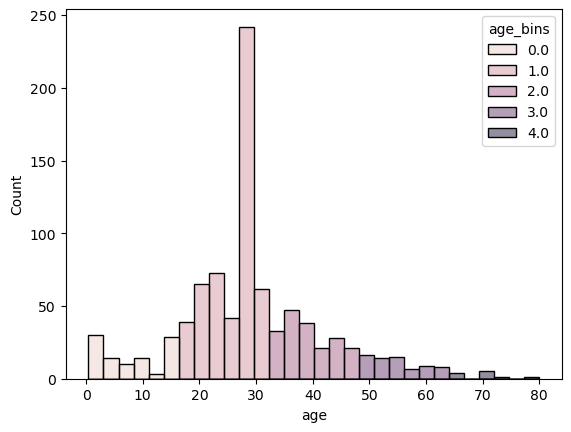

In [171]:
sns.histplot(dataFrame, x= 'age', hue = "age_bins")

<Axes: xlabel='age', ylabel='Count'>

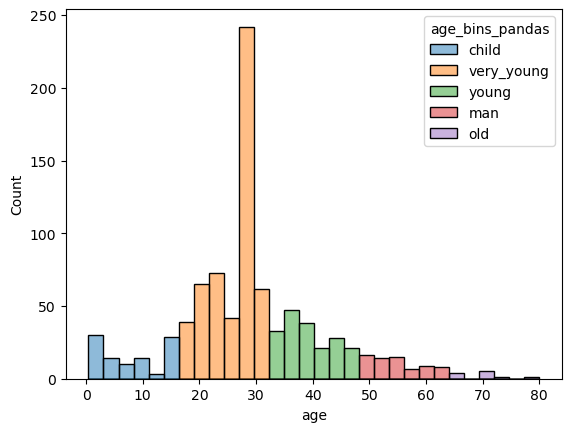

In [172]:
# descretizing the age column using pandas
dataFrame['age_bins_pandas'] = pd.cut(dataFrame['age'], bins=5, labels = [ "child","very_young","young", "man", "old"])
sns.histplot(dataFrame, x= 'age', hue = "age_bins_pandas")